# Let's Practice: Lab5A

In [51]:
#   __  __                   _                   _           
#  |  \/  |                 | |                 (_)          
#  | \  / | __ _  __ _  ___ | |_ _ __ ___  _ __  _  ___ ___  
#  | |\/| |/ _` |/ _` |/ _ \| __| '__/ _ \| '_ \| |/ __/ _ \ 
#  | |  | | (_| | (_| | (_) | |_| | | (_) | | | | | (_| (_) |
#  |_|  |_|\__,_|\__, |\___/ \__|_|  \___/|_| |_|_|\___\___/ 
#                 __/ |                                      
#                |___/                                       
# ─────────────────────────────────────────────────────────────────────────────
#                                                                           
# Script Name : Lab5A.py
# Author      : Dilan Castañeda                                             
# Created On  : September 25, 2024                                           
# Last Update : September 25, 2024                                         
# Version     : 1.0.0                                          
# Description : Fitter Distribution           
# ─────────────────────────────────────────────────────────────────────────────

## Import Libraries

In [2]:
# 1) Import pandas and numpy libraries
import pandas as pd
import numpy as np
import fitter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Extract

In [5]:
# 2) Read the csv file from the datasets directory in Canvas
df = pd.read_csv(r'C:\Users\dilan\Documents\Github\DataAnalysis_and_AI\period_2\Resources\Datasets\height-weight.csv')
df.sample(5)

,Gender,Height,Weight
2008,Male,66.416414,193.601091
9438,Female,67.585509,151.894080
6933,Female,62.311533,136.236833
1487,Male,73.279445,209.228854
5508,Female,63.921431,142.843103


## Trasnform

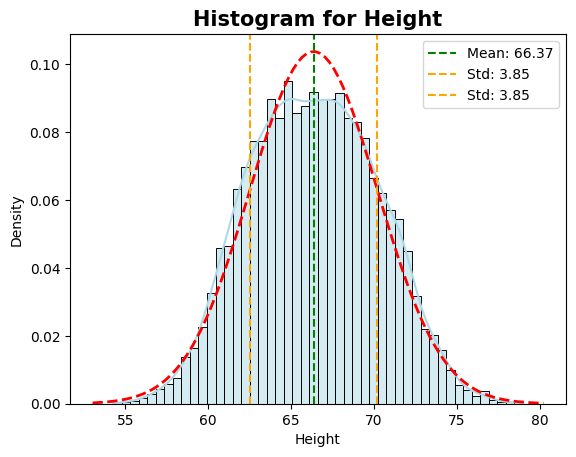

In [10]:
plt.subplot()
sns.histplot(df['Height'], kde=True, color='lightblue', stat="density")

# Fit a normal distribution to the data
mu, std = stats.norm.fit(df['Height'])

# Plot the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

# Scale the PDF by the max density of the histogram
plt.plot(x, p, 'r--', linewidth=2)

# Draw mean line and standar deviation
plt.axvline(mu, color='green', linestyle='--', label=f'Mean: {mu:.2f}')
plt.axvline(mu + std, color='orange', linestyle='--', label=f'Std: {std:.2f}')
plt.axvline(mu - std, color='orange', linestyle='--', label=f'Std: {std:.2f}')

plt.title(f'Histogram for Height', fontsize=15, fontweight='bold')
plt.xlabel('Height')
plt.ylabel('Density')
plt.legend()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.003108,848.384299,877.225660,inf,0.013858,4.254279e-02
lognorm,0.005285,803.794915,825.425936,inf,0.022982,5.083835e-05
gamma,0.005296,803.860095,825.491116,inf,0.023553,2.987814e-05
norm,0.005383,802.162043,816.582724,inf,0.025554,4.177451e-06
burr,0.014954,873.340116,902.181478,inf,0.063097,4.698479e-35


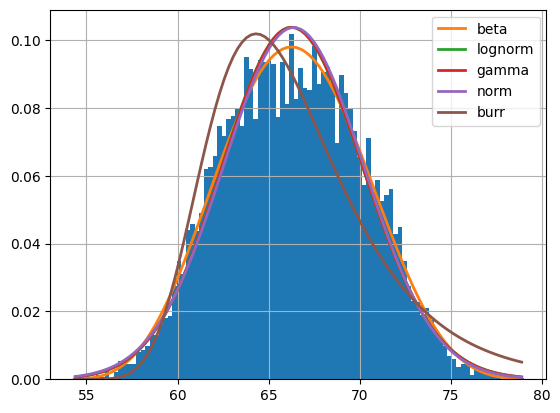

In [14]:
# 4) Find the best fitting distribution.
f = fitter.Fitter(df['Height'], distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
f.fit()
f.summary()

The best fit was beta since is the one which minimize the sum of the sqt error

In [15]:
# 5)  What are the parameters displayed by this function?
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 5.958319408062067,
  'b': 6.498169312519742,
  'loc': 52.87268950557022,
  'scale': 28.213574971918785}}

In [28]:
# 6) List all the available distributions for fitting
dists = []
for dist in fitter.get_common_distributions():
    if dist not in dists:
        dists.append(dist)

for dist in fitter.get_distributions():
    if dist not in dists:
        dists.append(dist)

print(f'The available distributions for fitting are {len(dists)}:')
sorted(dists)



The available distributions for fitting are 114:


['_fit',
 'alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gibrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'irwinhall',
 'jf_skew_t',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'multivariate_normal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',